## CSCE 633
## Homework 1: Linear models

#### Due: 11:59pm on September 21, 2023

## Part A- Linear Regression

### Reading Data

In [1]:
# Question A
import pandas as pd

file_path = 'hw1_q1_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [2]:
df.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,2598
3,Charmander,78,128,108,0.16,0.10,25.3,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,1568


### (A-i) (5 points) Data exploration:

In [3]:
# Import required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def get_pearson_coeff(feature1, feature2):
  
    #given 2 feature names return the Pearson’s correlation coefficient between them
  
  ### YOUR CODE HERE
    return feature1.corr(feature2)
  ### YOUR CODE HERE

def plot_scatter(feature1, feature2, feature1_name, feature2_name):
  
    #Plot a 2D Scatter Plot between the 2 features, make sure to label the plots properly
  
  ### YOUR CODE HERE
    plt.figure(figsize=(8, 6))
    plt.scatter(feature1, feature2, alpha=0.5)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(f"Scatter Plot of {feature1_name} vs {feature2_name}")
    plt.show()
  ### YOUR CODE HERE

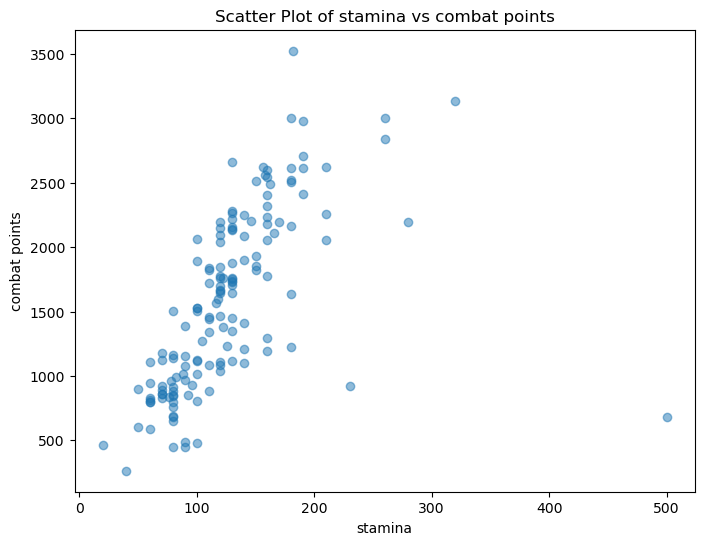

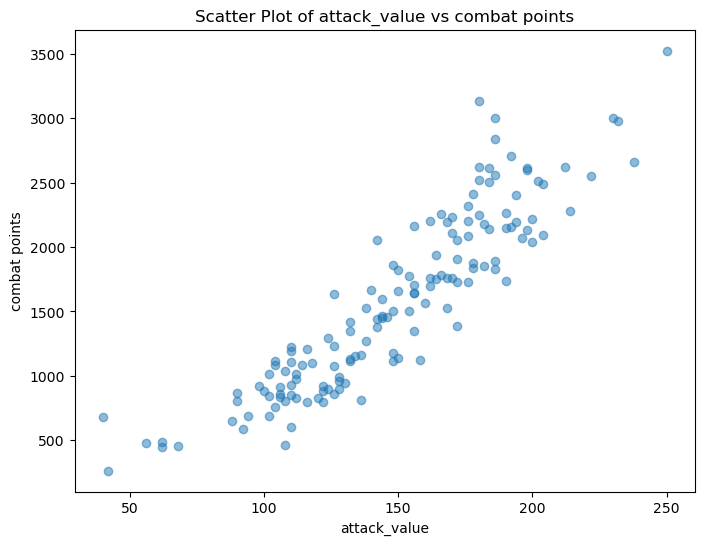

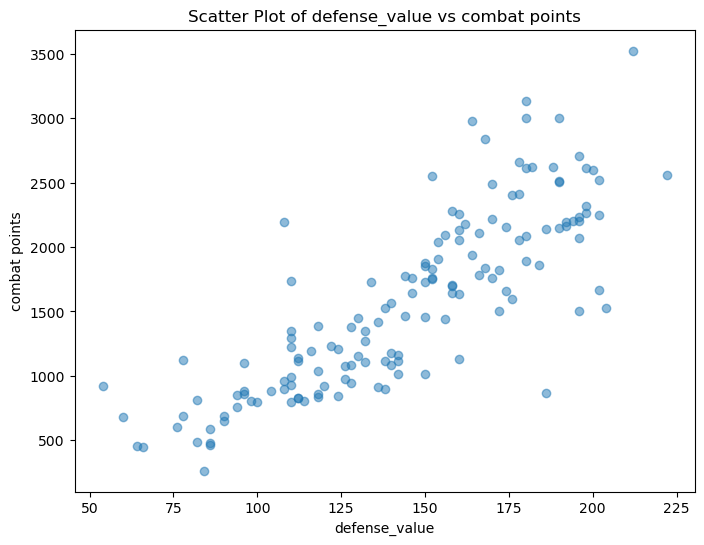

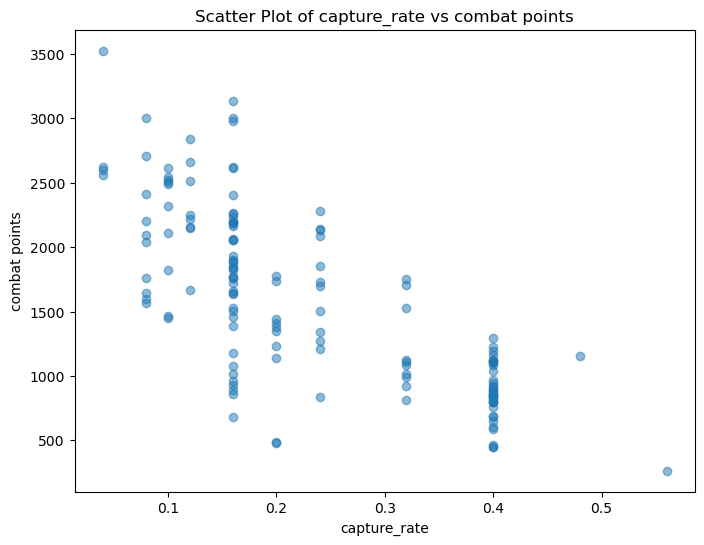

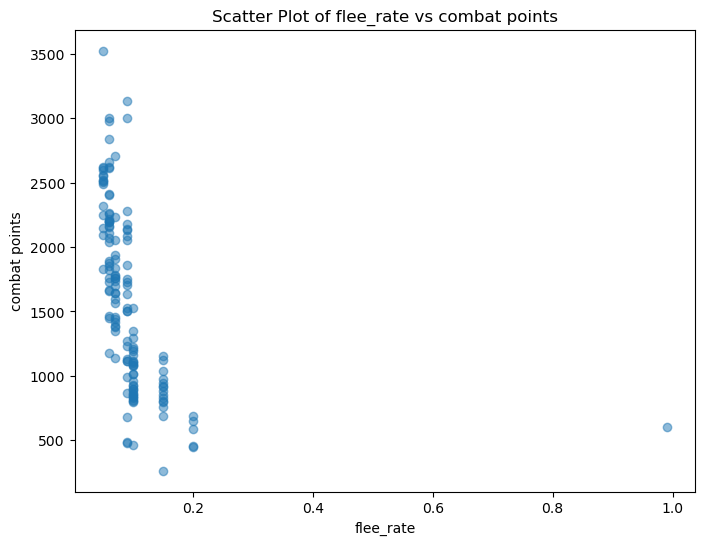

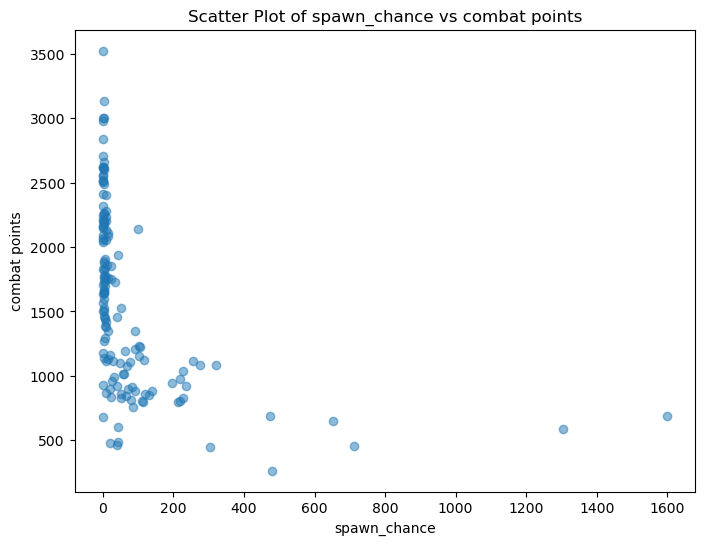

,feature,corr
0,stamina,0.582832
1,attack_value,0.907532
2,defense_value,0.826229
3,capture_rate,-0.743008
4,flee_rate,-0.407034
5,spawn_chance,-0.421327


In [5]:
features_list = df.columns[1:7].tolist()# This list stores the features in the data
coeff_list =  []# This list stores the Pearson correlation coefficient

### YOUR CODE HERE
for c1 in df.columns[1:7]: # df.columns[1:6] means selecting all columns from column[1] to the column[6]
    feature1 = df[c1]

    # Calculate Pearson correlation coefficient
    pearsons_r = get_pearson_coeff(feature1, df.combat_point)
    plot_scatter(feature1, df.combat_point, c1, "combat points")

    # Append the feature names and coefficients to the respective lists
    coeff_list.append(pearsons_r)
### YOUR CODE HERE

data_exploration1_result = pd.DataFrame()
data_exploration1_result['feature'] = features_list
data_exploration1_result['corr'] = coeff_list
data_exploration1_result

#### Here we can say that:
1. Attack value has highest positive degree of correlation with Combat points, meaning higher the attack value, higher the combat points.
2. Defense Value has second highest degree of correlation and hence if defense value is higher then combat points should be higher too
3. Stamina has a moderate positive degree of correlation and should be higher for a pokemon with higher combat points
4. Capture rate has highest negative degree of correlation with combat points. This means that a pokemon will be harder to catch if its combat points are higher.
5. flee rate has moderate negative degree of correlation with combat points. Therefore the likely-hood of a pokemon fleeing decreases as their respective combat points increase.
6. spawn chance also has a moderate negative correlation with combat points. Therefore a pokemon with high combat points will spwan less often.

Hence the features most predictive of combat points would be the **attack_value, defense_value and stamina to some degree**.

### (A-ii) (5 points) Data exploration:

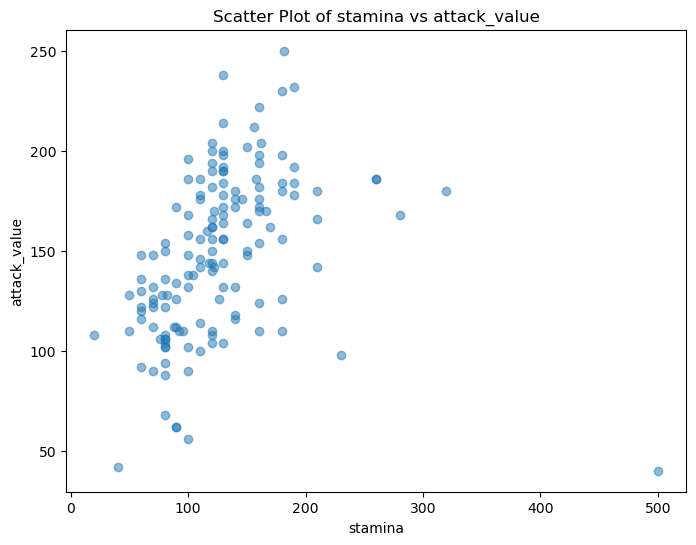

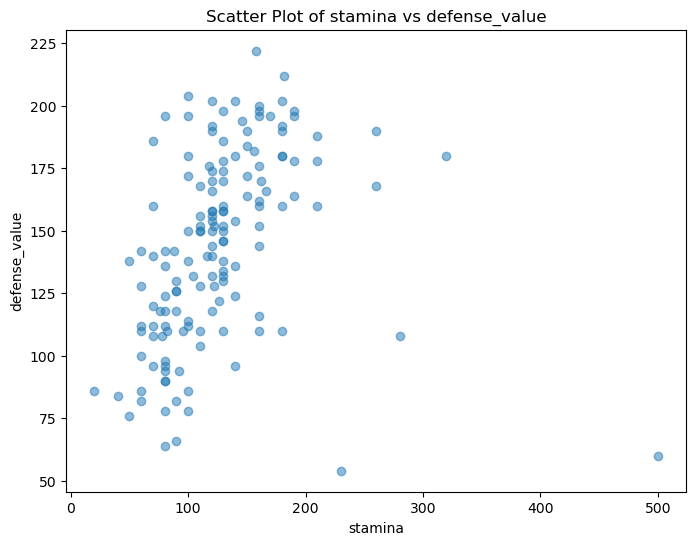

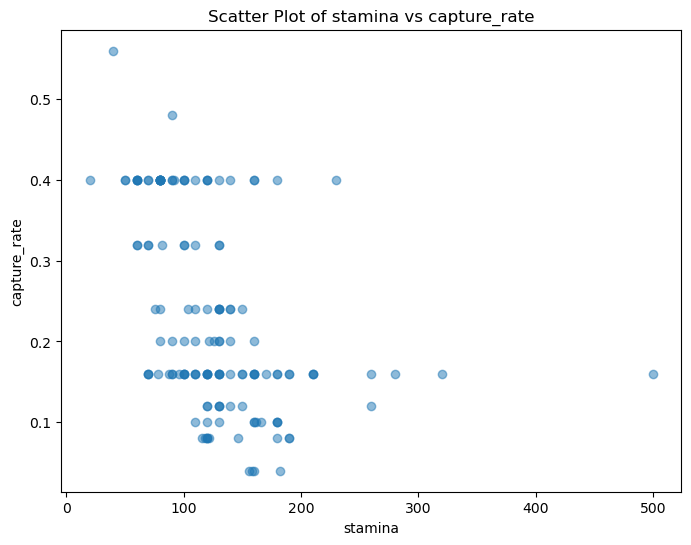

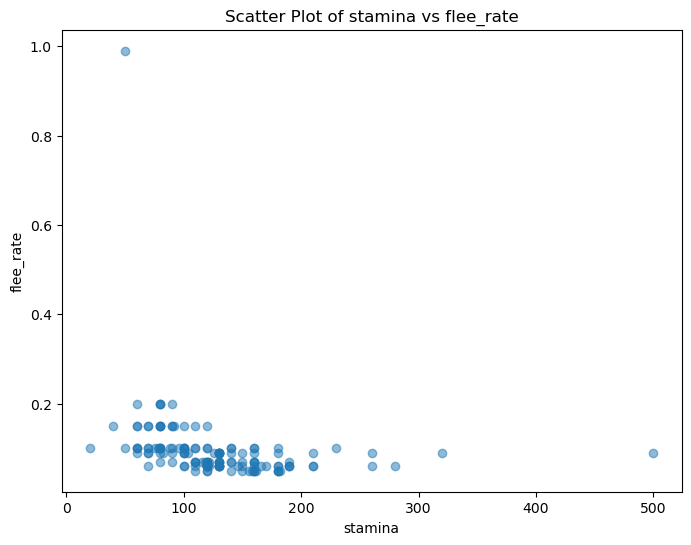

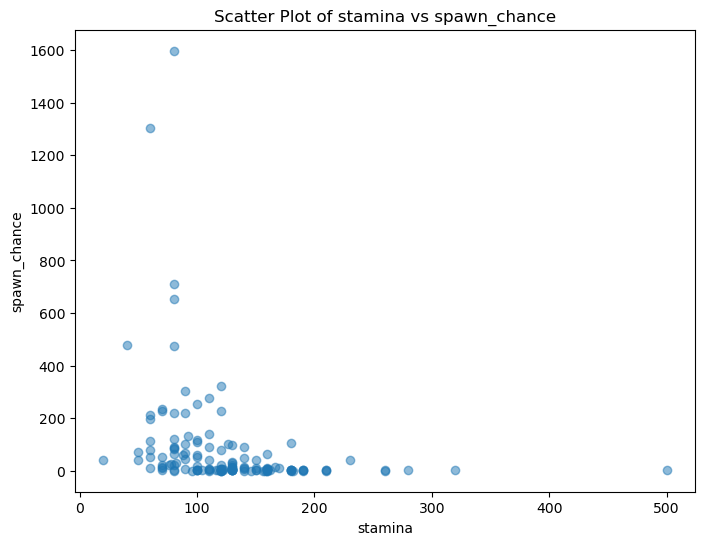

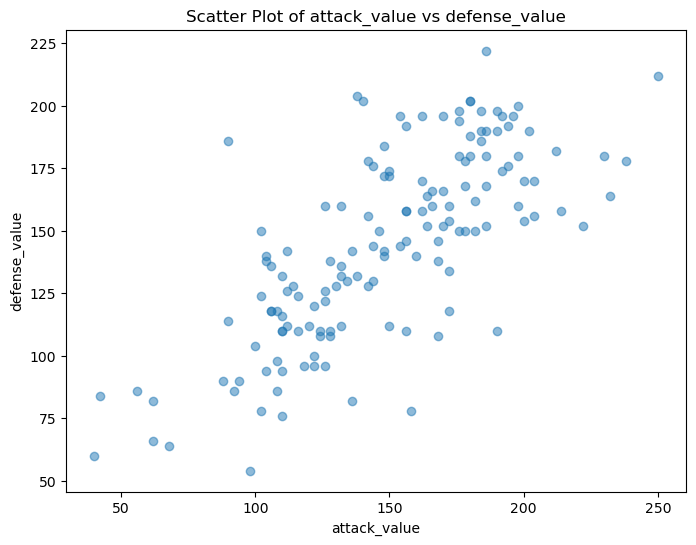

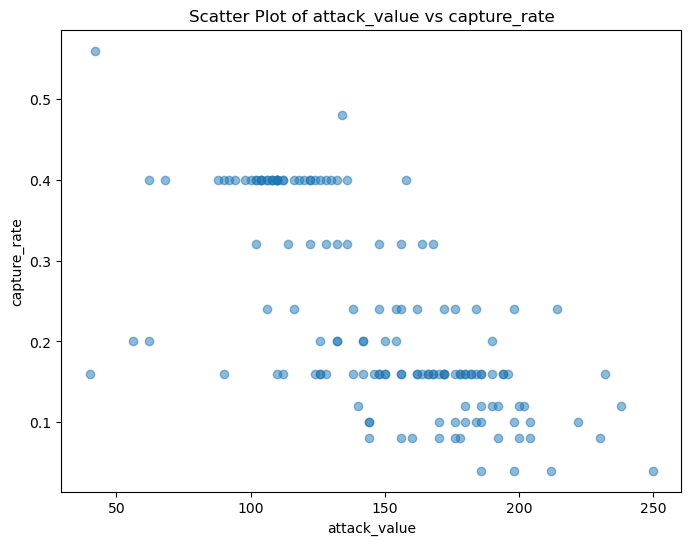

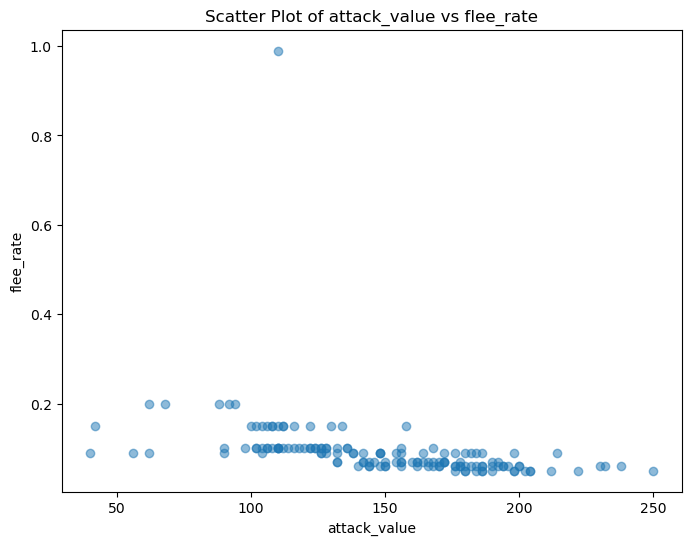

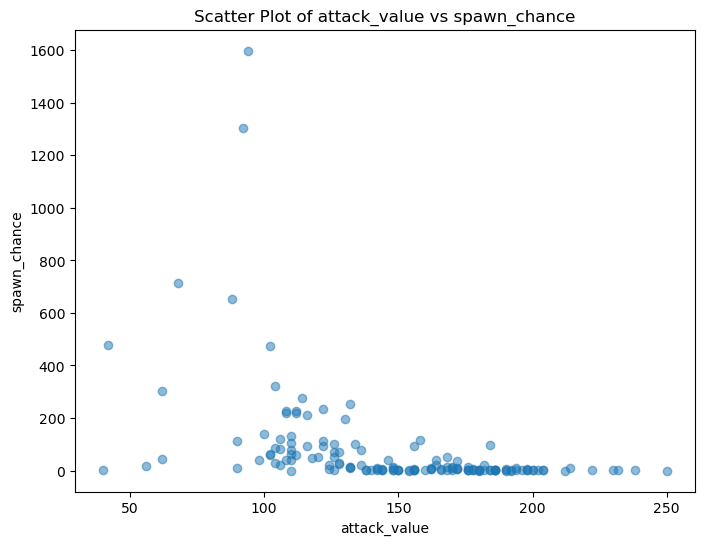

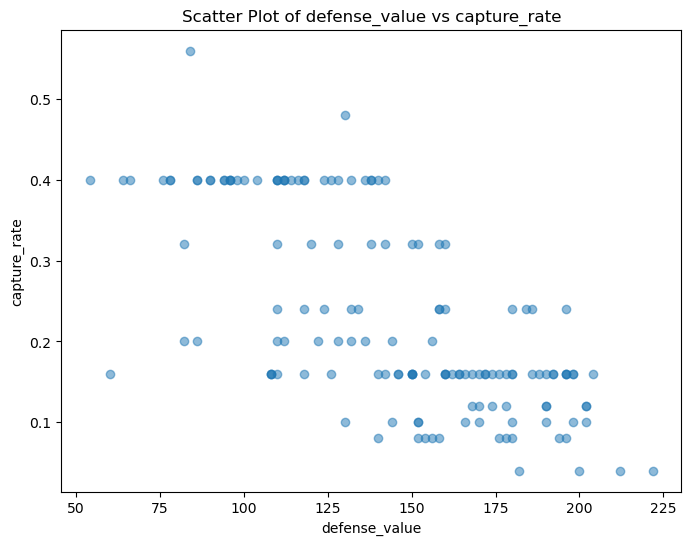

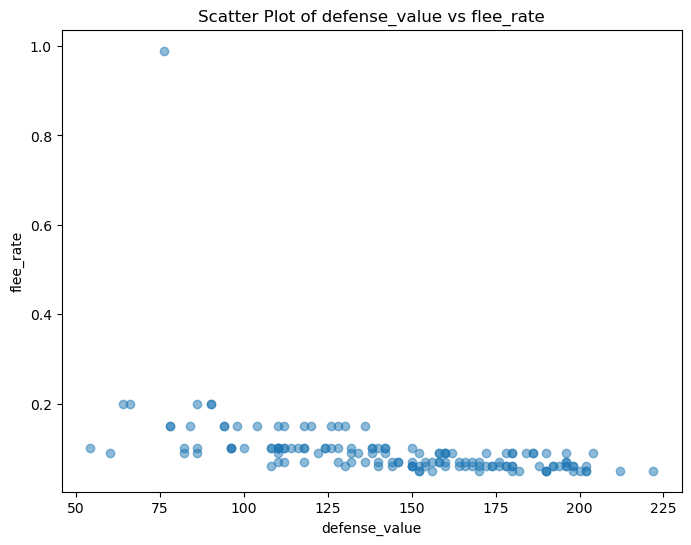

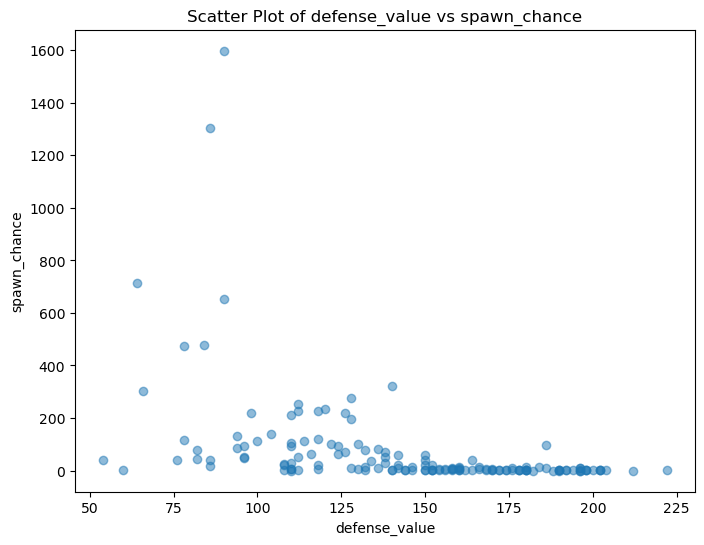

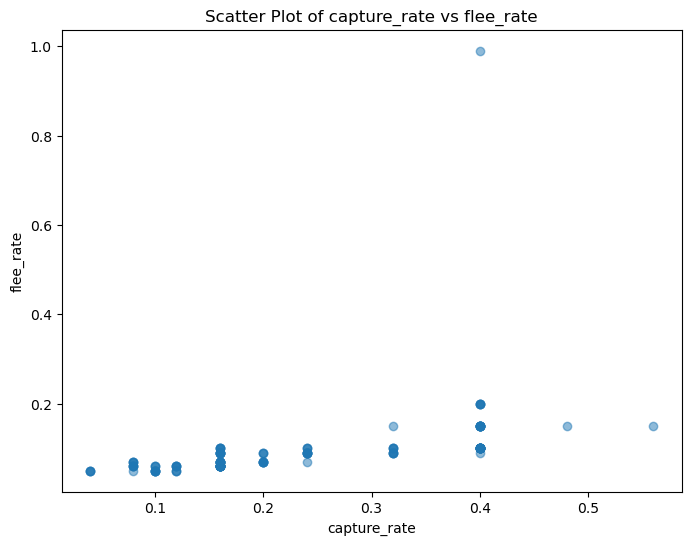

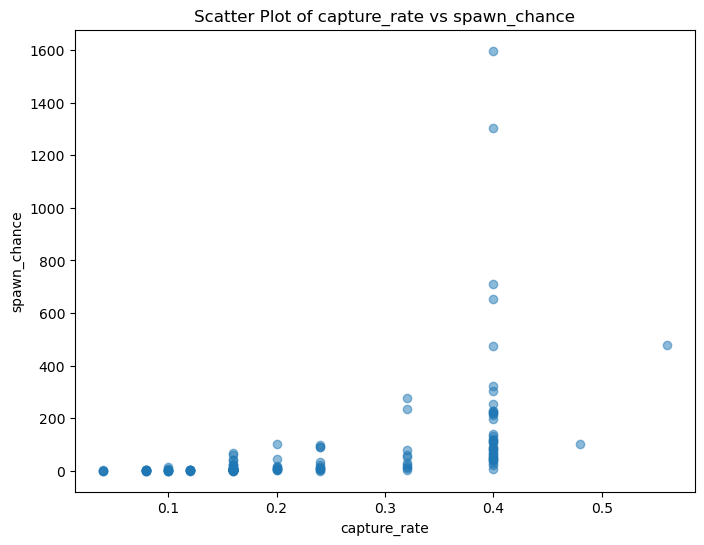

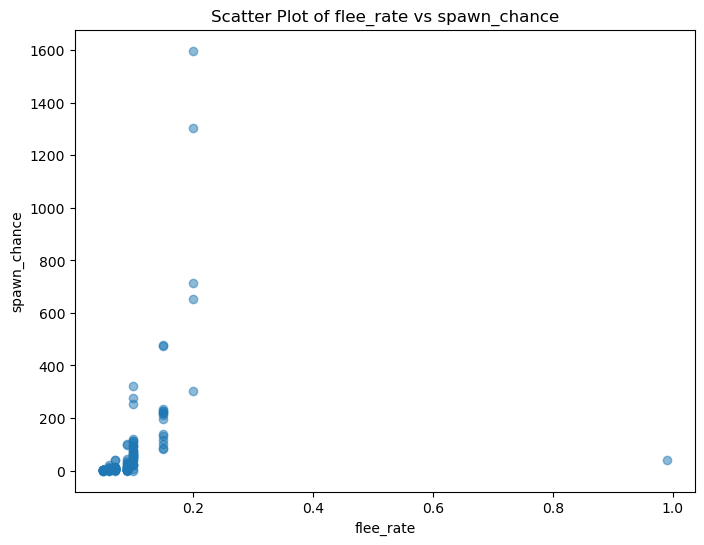

,Feature1,Feature2,corr_coeff
0,stamina,attack_value,0.302995
1,stamina,defense_value,0.302663
2,stamina,capture_rate,-0.446850
3,stamina,flee_rate,-0.271048
4,stamina,spawn_chance,-0.276420
5,attack_value,defense_value,0.736777
6,attack_value,capture_rate,-0.690573
7,attack_value,flee_rate,-0.369064
8,attack_value,spawn_chance,-0.432648
9,defense_value,capture_rate,-0.697266


In [6]:
n = len(features_list)
feature1_list = []
feature2_list = []
coeff_list = [] # This list stores the Pearson correlation values

for i in range(1,n):
  for j in range(i+1, n+1):

    feature1_list.append(features_list[i-1])
    feature2_list.append(features_list[j-1])

    ### YOUR CODE HERE
    #calc pearsons correlation coeff r and plot scatter graphs
    
    feature1 = (df.iloc[:, i]).astype("float32")
    feature2 = (df.iloc[:, j]).astype("float32")
    pearsons_r = get_pearson_coeff(feature1, feature2)
    coeff_list.append(pearsons_r)
    plot_scatter(feature1, feature2, feature1_list[-1], feature2_list[-1])
    
    ### YOUR CODE HERE

data_exploration2_result = pd.DataFrame()
data_exploration2_result['Feature1'] = feature1_list
data_exploration2_result['Feature2'] = feature2_list
data_exploration2_result['corr_coeff'] = coeff_list
data_exploration2_result

#### Features with most correlations:
Positive: attack value vs defense value have the highest positive correlation.

Negative: attack value vs capture rate as well as defense value vs capture rate have some of the highest negative correlations.

### (A-iii) (15 points) Predicting combat points:

In [7]:
# Import required packages here
import pandas as pd
import numpy as np
import operator
import math
from scipy import stats

In [8]:
def get_predictions(X_train, y_train, X_test):
    '''
    This function is called in the cell below
    Given the train data, write code for training a linear regression model and
    return the predictions on given test data
    '''
    X = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)
    m = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_train))
    
    y_pred = np.dot(X_test, m)
    
    return y_pred
    ### YOUR CODE HERE

In [9]:
### YOUR CODE HERE
k = 5 # for k=5 fold cross validation
rss_scores = []  # This list stores root mean squared errors for each fold
y_pred = [] # list will stores

y_df = df.combat_point
x_df = df.drop(["name", "combat_point"], axis = 1).values
L = len(y_df)

np.random.seed(194)
for j in range(0, k):
    
    train_indices = np.random.choice(L, int(0.8*L), replace=False)
    x_train = x_df[train_indices]
    y_train = y_df[train_indices]
    
    test_indices = np.random.choice(L, int(0.2*L), replace=False)
    x_test = x_df[test_indices]
    y_test = y_df[test_indices]

    y_pred = get_predictions(x_train, y_train, x_test)
        
    rss = ((y_pred - y_test) ** 2)

    sqrtRSS = math.sqrt(np.sum(rss))
    rss_scores.append(sqrtRSS)

### YOUR CODE HERE
print("square root of RSS = ", rss_scores)
average_rss = (sum(rss_scores)/k)# Compute the average rss
print("avg of the square root of RSS = ", average_rss)

square root of RSS =  [395.9281238003092, 376.97012885330486, 371.30540243909604, 502.31986175118686, 405.0495559561813]
avg of the square root of RSS =  410.3146145600156


There are 6 independent parameters and 1 dependent parameter(outcome) in this multi-variable Linear regression , the independent parameter being attack_value, defense_value, stamina, capture_rate, flee_rate, spawn_chance and the dependent being combat points.


### (A-iv) (15 points)

In [10]:
'''
  Experiment with different feature combinations and print the best avergae_rss
  Please provide the rationale behind selecting or dropping some features
'''

### YOUR CODE HERE
k = 5 # for k=5 fold cross validation
rss_scores = []  # This list stores root mean squared errors for each fold
y_pred = [] # list will stores

y_df = df.combat_point
x_df = df.drop(['name', 'capture_rate', 'flee_rate', 'spawn_chance','combat_point'], axis = 1).values
L = len(y_df)

np.random.seed(83)
for j in range(0, k):
    
    train_indices = np.random.choice(L, int(0.8*L), replace=False)
    x_train = x_df[train_indices]
    y_train = y_df[train_indices]
    
    test_indices = np.random.choice(L, int(0.2*L), replace=False)
    x_test = x_df[test_indices]
    y_test = y_df[test_indices]

    y_pred = get_predictions(x_train, y_train, x_test)
    rss = ((y_pred - y_test) ** 2)

    sqrtRSS = math.sqrt(np.sum(rss))
    rss_scores.append(sqrtRSS)

### YOUR CODE HERE
print("square root of RSS = ",rss_scores)
average_rss = (sum(rss_scores)/k)# Compute the average rss
print("avg of the square root of RSS = ", average_rss)

square root of RSS =  [517.9856600589934, 296.79274553705426, 439.4941463159447, 695.5702811484311, 351.8142004303612]
avg of the square root of RSS =  460.3314066981569


Question: Please provide the rationale behind selecting or dropping some features

Note: Limit your answer to this cell

I have chosen to drop the features with negative correlations as they would make the model more innaccurate.
While I choose the features attack_value and defense_value since they have the highest positive correlations with Combat points. Stamina is choosen as it has moderately high correlation with combat points.

### (A-v) (10 points)

Question: Explain the mathematical derivation for training the
linear regression model with ordinary least squares (OLS) solution.

---

(You should use LaTeX commands in a markdown cell to write the math)

Note: Limit your answer to this cell

##### Linear Regression

Below is the expression used to define a multi-variable linear regression,
where, 'm' are the weights, 'x' are the inputs, and 'y' is the output and 'e' is the error term.

$y = m_0 + m_1x_1 + m_2x_2 + m_3x_3 + ... + m_nx_n + e$

'm' are the weights associated with input 'X' and 'e' is the error, our objective is to minimize the error 'e' and we do this by using least squares method. The above equation can also be written in matrix form:

$$
\begin{bmatrix} y_1\\ y_2\\ y_3\\ \vdots \\ y_n\end{bmatrix}
=
\begin{bmatrix}
1 & x_11 & x_12 & \cdots & x_1k \\
1 & x_21 & x_22 & \cdots & x_2k \\
1 & x_31 & x_32 & \cdots & x_3k \\
1 & \cdots & \cdots & \cdots & \cdots \\
1 & x_n1 & x_n2 & \cdots & x_nk
\end{bmatrix}
*
\begin{bmatrix} m_0\\ m_1\\ m_2\\ \vdots \\ m_n\end{bmatrix}
+
\begin{bmatrix} e_0\\ e_1\\ e_2\\ \vdots \\ e_n\end{bmatrix}
$$

The extra column of 1 is an input and is added to compensate for the bias term $m_0$
Given equation of 'e':

$$
 y = Xm - e \\
\therefore e = Xm-y
$$

To minimize 'e' by OLS, we must choose a 'm' such that sum of squared error is as small as possible.

Minimize:

$$
\sum_{i=0}^{n} e_i^2 = e^{\prime}e \\
e^{\prime}e=
\begin{bmatrix} e_0 & e_1 & e_2 & \cdots & e_n\end{bmatrix}
*
\begin{bmatrix} e_0\\ e_1\\ e_2\\ \vdots \\ e_n\end{bmatrix} \\
\therefore = e_1^2 + e_2^2 + \cdots + e_n^2
$$

Now,

$$
e^{\prime}e = (y-Xm)^{\prime}(y-Xm) \\
\Rightarrow \min_m e^{\prime}e = yy^{\prime} -2mX^{\prime}y + mX^{\prime}X \\
\Rightarrow \frac{\delta(e^{\prime}e)}{\delta(m)} = -2X^{\prime}y + 2mX^{\prime}X = 0 \\
\Rightarrow mX^{\prime}X = X^{\prime}y \\
\Rightarrow m = (X^{\prime}X)^{-1}(X^{\prime}y) = (X^{T}X)^{-1}(X^{T}y)\\
$$

Below is the mathematical expression for the sqrt of RSS value for each fold as well as the mean over all sqrt of RSS:

Square root of RSS = $\sqrt{\sum{y_{pred} - y_{test}}} $

Mean sqrt of RSS = $\frac{\sqrt{\sum{y_{pred} - y_{test}}}}{k}$


#Part B - Logistic Regression

## (B-i) (20 points) Data Preprocessing

### 1. Download and read the data.
##### For Python, you may use pandas library and use read csv function

In [11]:
### YOUR Input HERE
import pandas as pd

hitters_file_path = 'hw1_q2_data.csv'
df_hitter = pd.read_csv(hitters_file_path)
### YOUR Input HERE

### 2. Print the data. How does the data look like? Add a short description about the data in the cell below.
#####  (You may use head() function in pandas library)

In [12]:
### YOUR CODE HERE
df_hitter
### YOUR CODE HERE

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


Question: How does the data look like? Add a short description about the data.

Note: Limit your answer to this cell

Data looks like a table, with 322 rows and 21 columns. Columns have labels for categorical data.

### 3. Print the shape of the data.
##### Shape means the dimensions of the data.


In [13]:
### YOUR CODE HERE
df_hitter.shape
### YOUR CODE HERE

(322, 21)

### 4. Does the data have any missing values? How many are missing? Print the number of missing values.
##### In pandas, check out isnul() and isnul().sum()


In [14]:
### YOUR CODE HERE
nc = df_hitter.isnull().sum().sum()
print("Yes, the Dataframe has null values in some cells, no. of null cells = ", nc)
### YOUR CODE HERE

Yes, the Dataframe has null values in some cells, no. of null cells =  59


### 5. Drop all the rows with any missing data and print the shape of the data frame.
##### In pandas, check out dropna(). dropna() accepts an argument inplace, check out what it does and when it comes in handy.



In [15]:
### YOUR CODE HERE
df_hitter = df_hitter.dropna(axis=0)
df_hitter.shape
### YOUR CODE HERE

(263, 21)

### 6. Extract the features and the label from the data.
##### Our label is NewLeague and all the others are considered features.


In [16]:
### YOUR CODE HERE
features = df_hitter.drop(columns = ['Player', 'NewLeague'])
labels = df_hitter['NewLeague']
### YOUR CODE HERE

### 7. Data preprocessing. We want to do one-hot encoding for categorical features.
##### First separate numerical columns from nonnumerical columns.
##### Afterwards, use get dummies for transforming to categorical. Then concat both parts (pd.concat()).


In [17]:
### YOUR CODE HERE
df_nonNumeric = features.select_dtypes(exclude=['int64', 'float64'])
df_numeric = features.select_dtypes(include=['int64', 'float64'])
df_dummies = pd.get_dummies(df_nonNumeric)


data = pd.concat([df_numeric, df_dummies], axis=1)
### YOUR CODE HERE

### 8. Transform the output into numerical format.
##### If you have selected the label as a pandas series, you can use .replace() function. In the label, transform ’A’ to 0 and ’N’ to 1.


In [18]:
### YOUR CODE HERE
labels = labels.replace('A', 0)
labels = labels.replace('N', 1)
### YOUR CODE HERE

## (B-ii) (20 points) Models for Hitters

### 1. Prediction: Using 80% of the data as a training set and 20% as a testing set.
#### You may use sklearn package in this question.


In [19]:
# Import required packages here
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [20]:
### YOUR CODE HERE
# below line will automaticaally random split the data in 'data' and 'labels' for train test vars.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=45)

# Linear Regression:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test) #predict Y

# Logistic Regression:
logistic = LogisticRegression()
logistic.fit(StandardScaler().fit_transform(X_train), y_train)
logistic_pred = logistic.predict(StandardScaler().fit_transform(X_test)) #predict Y
logistic_prob = logistic.predict_proba(StandardScaler().fit_transform(X_test)) #predict Y - probabilities
### YOUR CODE HERE

### 2. Print the coefficients for each feature for both models. Are they the same? Are they different? Why? Please describe your observation in the cell below.

In [21]:
linear_coef   = linear.coef_ # to store the coefficients of the linear regression model
logistic_coef = logistic.coef_ # to store the coefficients of the logistic regression model
print(linear_coef)
print('\n')
print(logistic_coef)

[ 6.42319103e-04 -1.25042768e-03 -4.93584677e-03 -1.00253752e-03
  1.38363332e-03  9.91591419e-04 -1.71032033e-03 -1.70454937e-04
  1.16044941e-03  1.46055644e-03 -6.40500501e-04 -7.18770101e-04
  2.88858105e-06 -2.10955671e-05 -2.17054479e-05 -3.35071912e-03
 -5.81284225e-05 -4.22644334e-01  4.22644334e-01  1.01762111e-02
 -1.01762111e-02]


[[ 0.45614968  0.30613127 -0.39398659 -0.43576406  0.18713168  0.25540719
  -0.15833522  0.13484763  0.5409155  -0.12473293  0.0578622   0.11807416
  -0.6351563  -0.10323749 -0.07355432 -0.20761463 -0.12916252 -1.28537538
   1.28537538  0.04671009 -0.04671009]]


Question:  Are the coefficients for each feature for both models the same? Are they different? Why? Please describe

Answer:
Coefficients are different for each feature for both models. This is because Linear Regression and Logistic Regression perform within different ranges of data. Linear Regression deals with continuous target variables and hence the coefficients are adjusted to fit a continuous range. While Logistic regression deals with binary or probabilistic outcomes so the coefficients are fitted to a log-add scale which is used in a model for probabilities.

### 3. Plot the ROC curve for both models. Print the area under the curve measurements.


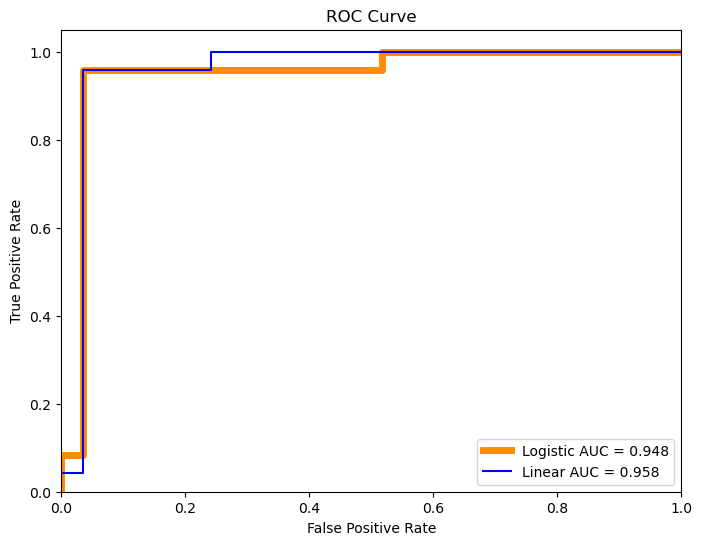

Logistic AUC = 0.9482758620689655
Linear AUC = 0.9583333333333334


In [22]:
### YOUR CODE HERE

# ROC and AUC for Linear regression:
linear_fpos_rate, linear_tpos_rate, linear_threshold = roc_curve(y_test, linear_pred, drop_intermediate=False)
linear_auc = auc(linear_fpos_rate, linear_tpos_rate)

# ROC and AUC for Logistic regression:
logistic_fpos_rate, logistic_tpos_rate, logistic_threshold = roc_curve(y_test, logistic_prob[:, 1], drop_intermediate=False)
logistic_auc = auc(logistic_fpos_rate, logistic_tpos_rate)

# PLOT
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpos_rate, logistic_tpos_rate, color='darkorange', lw = 5, label=f'Logistic AUC = {logistic_auc:.3f}')
plt.plot(linear_fpos_rate, linear_tpos_rate, color='blue', label=f'Linear AUC = {linear_auc:.3f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'Logistic AUC = {logistic_auc}')
print(f'Linear AUC = {linear_auc}')

### YOUR CODE HERE

### 4. What is the optimal decision threshold to maximize the f1 score? Print the optimal threshold.
### How did you calculate the optimal threshold? Explain in the cell below.


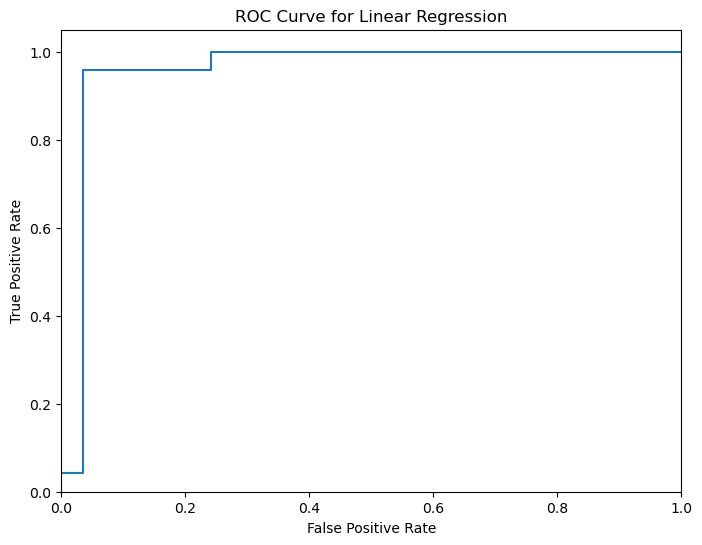

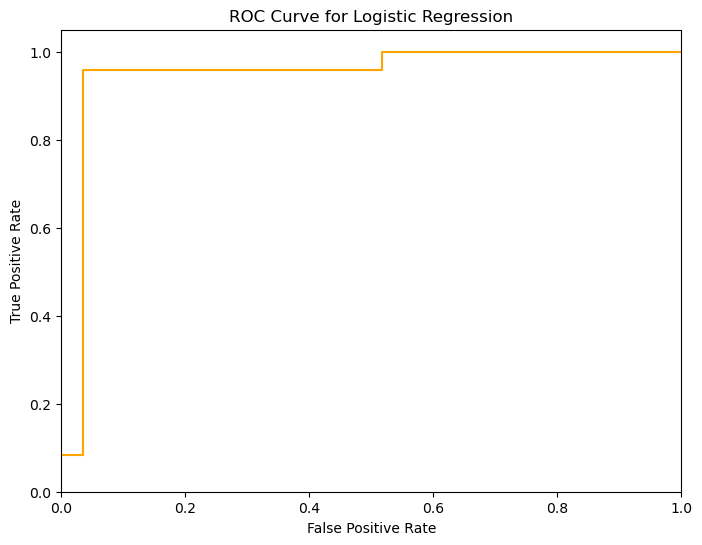

area under the curve for Linear Reg Model=  0.9583333333333334
area under the curve for Logistic Reg Model=  0.9482758620689655
Optimal Threshold for Linear Model=  0.8118921798545535
Optimal Threshold for Logistic Model=  0.8479552829047269


In [23]:
# Import required packages here
import numpy as np
from typing import Tuple, List

def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression
        Model in the following order
        [linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    pred = linear_model.predict(x_test)
    fpos_rate, tpos_rate, threshold = roc_curve(y_test, pred, drop_intermediate=False)
    area = auc(fpos_rate, tpos_rate)
    
    Tuple = (pred, fpos_rate, tpos_rate, threshold, area)
    
    # PLOT
    plt.figure(figsize=(8, 6))
    plt.plot(fpos_rate, tpos_rate, label=f'Linear AUC = {area:.3f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Linear Regression')
    plt.show()
    
    return Tuple

    ### YOUR CODE HERE

def logistic_pred_and_area_under_curve(logistic_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of
        Logistic Regression Model in the following order
        [log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    ### YOUR CODE HERE
    pred = logistic_model.predict(StandardScaler().fit_transform(x_test))
    proba = logistic_model.predict_proba(StandardScaler().fit_transform(x_test))
    fpos_rate, tpos_rate, threshold = roc_curve(y_test, proba[:, 1], drop_intermediate=False)
    area = auc(fpos_rate, tpos_rate)
    
    Tuple = (pred, fpos_rate, tpos_rate, threshold, area)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpos_rate, tpos_rate, color='orange', label=f'Linear AUC = {area:.3f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.show()
    
    return Tuple

    ### YOUR CODE HERE

linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(linear, X_test, y_test)

log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(logistic, X_test, y_test)


print('area under the curve for Linear Reg Model= ', linear_reg_area_under_curve )
print('area under the curve for Logistic Reg Model= ', log_reg_area_under_curve )

linear_optimal_threshold= -1
log_optimal_threshold= -1
### YOUR CODE HERE
'''
  Write code to determite the optimal threshold for linear and logistic regression
  and store them in linear_optimal_threshold and log_optimal_threshold
'''
#optimal threshold calc:

# Linear
p, r, t = precision_recall_curve(y_test, linear_y_pred)
f1_lin = (2 * p * r) / (p + r)
idx = np.argmax(f1_lin)
linear_optimal_threshold = t[idx]

# Logistic
p, r, t = precision_recall_curve(y_test, logistic_prob[:, 1])
f1_logistic = (2 * p * r) / (p + r)
idx = np.argmax(f1_logistic)
log_optimal_threshold = t[idx]

### YOUR CODE HERE

print('Optimal Threshold for Linear Model= ', linear_optimal_threshold)
print('Optimal Threshold for Logistic Model= ', log_optimal_threshold)

Question: What is the optimal decision threshold to maximize the f1 score? How did you calculate the optimal threshold?

Note: Limit your answer to this cell
Optimal Threshold for Linear Model=  0.8118921798545535
Optimal Threshold for Logistic Model=  0.8479552829047269

Above Optimal thresholds can be used to maximize the f1 values. We find these by using the probablitiy based predictions of y which we can use to find the value for f1. Upon finding all the values of f1 possible we look for the threshold value that obtained us max f1 value.

### 5. Five-fold Cross-validation: Repeat (1) using a stratified, five-fold cross-validation.


In [24]:
from sklearn.model_selection import StratifiedKFold

def train_test_folds(skf, num_of_folds: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    '''
        train and test in for loop with different training and test sets obatined from skf.
        use a PENALTY of 12 for logitic regression model for training
        find features in each fold and store them in features_count array.
        populate auc_log and auc_linear arrays with roc_auc_score of each set trained on logistic regression and linear regression models respectively.
        populate f1_log and f1_linear arrays with f1_score of each set trained on logistic regression and linear regression models respectively.
        return features_count, auc_log, auc_linear, f1_log and f1_linear
    '''
    num_of_folds = num_of_folds
    max_iter = 100000008

    X = data
    y = labels
    auc_log = []
    auc_linear = []
    features_count = []
    f1_log= []
    f1_linear= []

    ### YOUR CODE HERE
    for train_i, test_i in skf.split(X, y):
        X_traink, X_testk = X.iloc[train_i], X.iloc[test_i]
        y_traink, y_testk = y.iloc[train_i], y.iloc[test_i]
        
        #linear Regression:
        k_linear_model = LinearRegression()
        k_linear_model.fit(X_traink, y_traink)
        k_linear_pred = k_linear_model.predict(X_testk)
        
        #logistic regression with penalty 12:
        k_log_model = LogisticRegression(C=1/12, max_iter = max_iter)
        k_log_model.fit(X_traink, y_traink)
        k_log_pred = k_log_model.predict(X_testk)
        k_log_prob = k_log_model.predict_proba(X_testk)
        
        #AUC calc:
        auc_linear.append(roc_auc_score(y_testk, k_linear_pred))
        auc_log.append(roc_auc_score(y_testk, k_log_prob[:,1]))
        
        # F1 calc:        
        p, r, _ = precision_recall_curve(y_testk, k_linear_pred)
        f1_lin = (2 * p * r) / (p + r)
        f1_linear.append(max(f1_lin))
     
        p, r, _ = precision_recall_curve(y_testk, k_log_prob[:,1])
        f1_logistic = (2 * p * r) / (p + r)
        f1_log.append(max(f1_logistic))
        
        #update feature_count:
        features_count.append(X_traink.shape[1])
        
    return features_count, auc_log, auc_linear, f1_log, f1_linear

    ### YOUR CODE HERE


num_folds= 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)
features_count, auc_log, auc_linear, f1_log, f1_linear = train_test_folds(skf, num_folds)
print(features_count, auc_log, auc_linear, f1_log, f1_linear)

[21, 21, 21, 21, 21] [0.9557142857142857, 0.9199999999999999, 0.8994252873563219, 0.9375, 0.9598214285714286] [0.95, 0.8985714285714286, 0.9166666666666666, 0.9464285714285714, 0.9598214285714286] [0.96, 0.9056603773584904, 0.8979591836734694, 0.9387755102040817, 0.9199999999999999] [0.96, 0.9019607843137256, 0.8979591836734694, 0.9361702127659574, 0.9387755102040817]


### 6. Does the feature count change in each fold? Please explain in the cell below.


In [25]:
def is_features_count_changed(features_count: np.array) -> bool:
    '''
       compare number of features in each fold (features_count array's each element)
       return true if features count doesn't change in each fold. else return false
    '''
    ### YOUR CODE HERE
    for index in range(1, len(features_count)):
        if(features_count[index-1] != features_count[index]):
            return False
    
    return True
    ### YOUR CODE HERE

# call is_features_count_changed function and print true if features count changes in each fold. else print false
print(is_features_count_changed(features_count))

True


Question: Do the features change in each fold?

Note: Limit your answer to this cell

No the features remain the same, since stratified K fold split data based on the rows, no. of columns in data remain same


In [26]:
import scipy.stats
def mean_confidence_interval(data: np.array, confidence=0.95) -> Tuple[float, float, float]:
    '''
        The required interval is from mean-h to mean+h
        return the tuple consisting of mean, mean-h, mean+h
    '''
    ### YOUR CODE HERE
    m = np.mean(data)

    # Calculate the margin of error (ME) using the desired confidence level
    mErr = (stats.sem(data)) * (stats.norm.ppf((1 + confidence) / 2))

    # Calculate the lower and upper bounds of the confidence interval
    min_b = m - mErr
    max_b = m + mErr

    return m, min_b, max_b

    ### YOUR CODE HERE


### 7. Please provide a mean and 95% confidence interval for the AUROCs for each model.

In [27]:
auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the AUROCs for linear model= '    , mean_confidence_interval(auc_linear))
print('mean and 95% confidence interval for the AUROCs for logistic model= '  , mean_confidence_interval(auc_log))

mean and 95% confidence interval for the AUROCs for linear model=  (0.9342976190476191, 0.9118117798945298, 0.9567834582007084)
mean and 95% confidence interval for the AUROCs for logistic model=  (0.9344922003284072, 0.9124014592741029, 0.9565829413827115)


### 8. Please provide a mean and 95% confidence interval for the f1 score for each model.

In [28]:
f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_linear))
print('mean and 95% confidence interval for the f1 score for logistic model= '  , mean_confidence_interval(f1_log))

mean and 95% confidence interval for the f1 score for linear model=  (0.9269731381914468, 0.9038568474709444, 0.9500894289119491)
mean and 95% confidence interval for the f1 score for logistic model=  (0.9244790142472084, 0.9023755457110931, 0.9465824827833236)


#(B-iii) (10 points)

### Explain the mathematical derivation you used for implementing the training of your linear and logistic regression models.
---

(You should use LaTeX commands in a markdown cell to write the math)

Note: Limit your answer to this cell

Plan:
1. linea reg formula by OLS
2. logistic reg formula, define sigmoid funcn
3. all other formulae used

Below is the mathematical expression for functions and Regressions used in Part B of this HW:

##### Logistic Regression

Logistic Regression is used for classification models and is most popular for binary classification. Logistic Regression uses a function called the Sigmoid Function, given by:
$$
F(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x} = \frac{e^{m_{0} + m_{1}x}}{1+e^{m_{0} + m_{1}x}}
$$
Here, $F(x)$ is the output, $x$ is input, $m_0$ is bias and $m_1$ is called the coefficient for x

Sigmoid function normally squeezes the output of a linear equation into a probability between 0 and 1, this probability is used along with a boundary to obtain classified outputs.

Logistic regression will predict probabilities for its default class, here the default class is 'New_league' having a 'N'.

Logistic regression is derived from a linear regression equation shown by,
$$
log \frac{F(x)}{1-F(x)} = m_{0} + m_{1}x \\
\therefore F(x) = \frac{e^{m_{0} + mx}}{e^{m_{0} + mx} + 1}
$$

P is probability,
$$
P(m_0, m) = \prod^{n}_{1}{F(x_{i})^{y_i}}{1-F(x_i)^{1-y_i}}
$$
Can be written as,
$$
P(m_0, m) = \sum^n_{i=1} y_i\log{F(x_i)}+(1-y_i)\log{1-F(x_i)} \\
\therefore P(i) = \sum^n_{i=1}{\log{1-F(x_i)}} + \sum^n_{i=1}{y_i\log{\frac{F(x_i)}{1-F(x_i)}}}
$$

For this Logistic Regression we will use Cross-Entropy Loss as the Loss function. This is commonly used to measure differences between the predicted probabilties and actual values.

The Cross-Entropy Loss function is define by,

$$
Cross-Entropy Loss = -\frac{1}{n}\sum^{n}_{i = 1}{[{y_i}\log{p_i} + (1-y_i)\log{1-p_i}]}\\
$$
where,

$y_i$ is binary label for our binary clssification ( so a 0 or 1 )

$n$ is the number of samples

$p_i$ is the predicted probability that $i^{th}$ sample belongs to the class '1'

Objective in a Logistic Regression is to tune hyper-parameters such that Loss function is minimized.

###### F-1 Scores

TP = True Positives, FP = False Positives, FN = False Negatives.

$$
Recall = \frac{TP}{TP+FN} \\
Precision = \frac{TP}{TP+FP} \\
F-1 = \frac{2 \cdot Recall \cdot Precision}{Precision + Recall} \\
\therefore F-1 = \frac{2TP}{2TP + FN + FP}
$$
